In [2]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib

In [6]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
ww = 200
bs = 32

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)



linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f  = d2d.import_data(filename = file)

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


In [8]:
multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=ww,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=list(np.arange(0,2308,1)),
                                                shuffle=True,
                                                batch_size=bs)

2308


In [9]:


normed_das = (das_data_all[:,0:2308] - multi_step_window_shuffled.chan_mean)/multi_step_window_shuffled.chan_std

times_for_dis = matplotlib.dates.date2num(f['Times'][:])

In [10]:
temp = pd.read_pickle(r'temp_array.pkl')
dates_for_temp = pd.read_pickle(r'dates_4_temp.pkl')
precip =  pd.read_pickle(r'precip_mm.pkl')

(5041,)

In [13]:
times = times_for_dis

In [23]:
precip_per_hour = [i * 6 for i in precip]

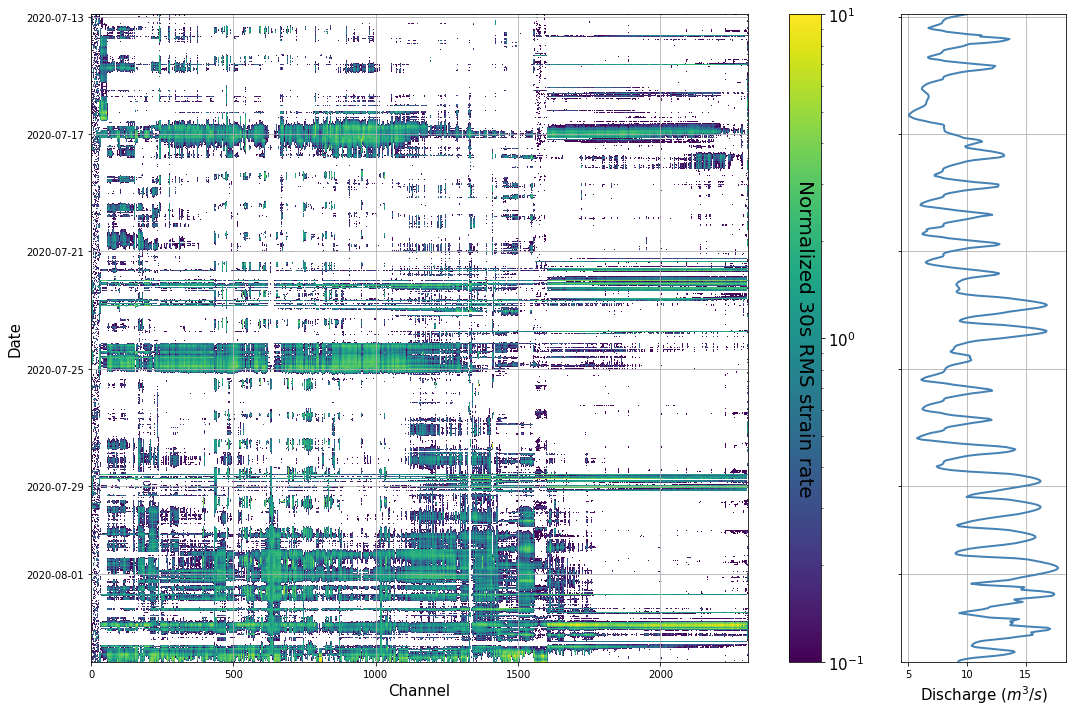

In [354]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib notebook

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols =2, figsize = [15,10], gridspec_kw={'width_ratios': [5, 1]})
#fig.suptitle('DAS Deployment on Rhonegletscher, Switzerland', size = 20)
fig.patch.set_facecolor('white')

im = ax1.imshow(normed_das, aspect='auto', norm=matplotlib.colors.LogNorm(vmin = 0.1, vmax = 10), extent = [0, 2308,  times[-1], times[0]]) 
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Normalized 30s RMS strain rate', rotation = '270', labelpad = -50, size = 20)
cbar.ax.tick_params(labelsize=15)
ax1.grid()
ax1.set_xlabel('Channel', size = 15)
ax1.set_ylabel('Date', size = 15)
ax1.yaxis_date()

ax2.plot(f['Discharge'][:], times, c='steelblue', lw=2)
ax2.yaxis_date()
ax2.set_ylim([times[0],times[-1]])
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_xlabel('Discharge $(m^3/s)$', size = 15)
ax2.set_yticklabels([])
ax2.grid()

# ax3.plot(temp, dates_for_temp)
# ax3.yaxis_date()
# ax3.set_ylim([times[0],times[-1]])
# ax3.set_ylim(ax3.get_ylim()[::-1])
# ax3.set_xlabel('Temperature $(C)$')
# ax3.set_yticklabels([])
# ax3.grid()

plt.tight_layout()
#plt.show()
plt.savefig('DAS_discharge_timeseries_final.png', dpi=600)


In [31]:
times[-1]-times[0]

22.104409722222044

In [29]:
len(times_for_dis)

62745

In [45]:
print(dates_for_temp[1]-dates_for_temp[0])

0.006944444445252884


In [30]:
delta_time = 600 #seconds, 10 minute data

AttributeError: 'numpy.float64' object has no attribute 'total_seconds'

In [53]:
f_i = 0.008

In [56]:
PDD=(((dates_for_temp[1]-dates_for_temp[0]))*np.asarray(temp))*f_i*17600000

In [129]:
alpha = 4000 #mm/day

beta = 300 #mm/(day*degree C)

In [130]:
A = ((alpha/144)*(dates_for_temp[1]-dates_for_temp[0])) + (beta/144)*((dates_for_temp[1]-dates_for_temp[0])*np.asarray(temp))

In [131]:
ablation = (A/(600*1000))*17600000

In [132]:
ablation #m^3/s

array([11.2178498 , 11.17541152, 11.13297325, ...,  7.95010288,
        7.90766461,  7.86522634])

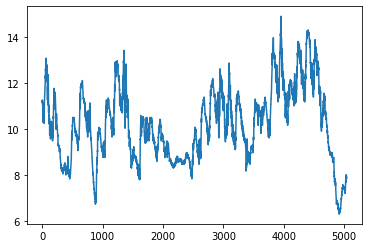

In [133]:
plt.plot(ablation)
plt.show()

# PDD calculated using Cuffey and Patterson

In [15]:
f_i = 7 #mm/(day*degree C)
f_s = 3 #mm/(day*degree C)
area_rhone = 17.6e12 #mm squared

lapse_rate_corr = 3.28 #celcius/1000m
ten_min_to_secs = 600 # seconds in 10 minuntes

mm3_to_m3 = 1e9

In [16]:
diff_in_alt = .9405 #km

In [17]:
new_temp = (np.asarray(temp) - (lapse_rate_corr)*diff_in_alt)

In [18]:
new_temp

array([10.01516,  9.91516,  9.81516, ...,  2.31516,  2.21516,  2.11516])

In [266]:
m_i_corr = []
m_s_corr = []
for i in new_temp:
    if i > 0:

        m_i = delta_time * (i) * f_i * area_rhone / ten_min_to_secs / mm3_to_m3
        m_s = delta_time * (i) * f_s * area_rhone / ten_min_to_secs / mm3_to_m3
        
        m_i_corr.append(m_i)
        m_s_corr.append(m_s)
    else:
        m_i = 0
        m_s = 0
        m_i_corr.append(m_i)
        m_s_corr.append(m_s)
    
    

In [267]:
m_i = delta_time * (np.asarray(temp)) * f_i * area_rhone / ten_min_to_secs / mm3_to_m3
m_s = delta_time * (np.asarray(temp)) * f_s * area_rhone / ten_min_to_secs / mm3_to_m3

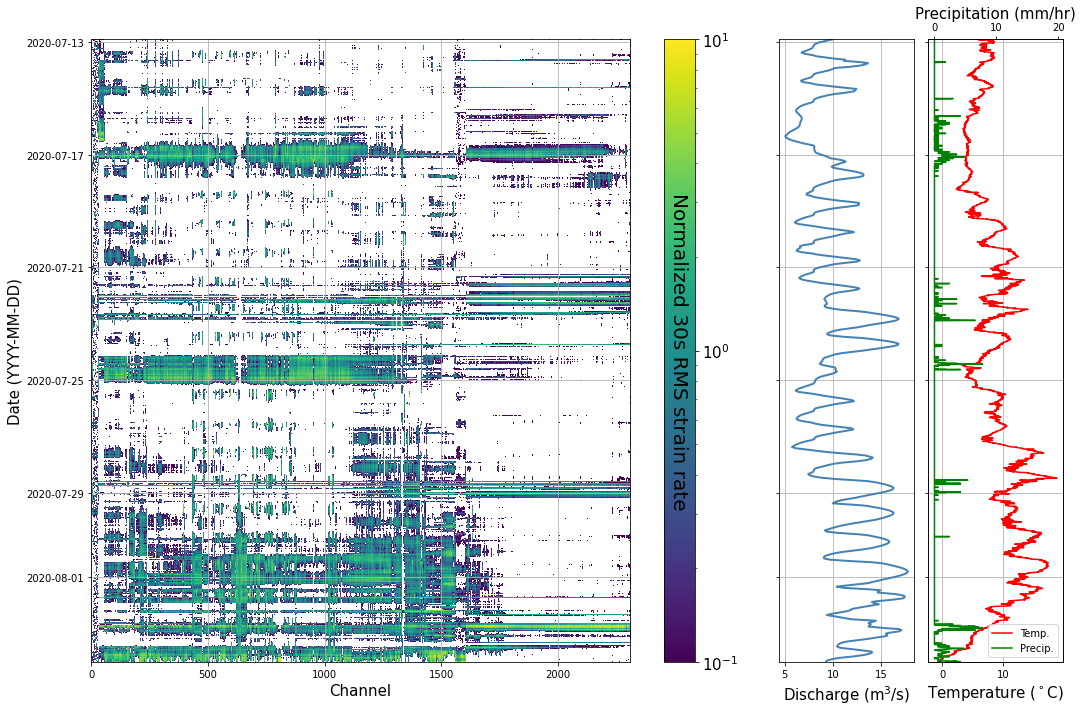

In [93]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib notebook

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols =3, figsize = [15,10], gridspec_kw={'width_ratios': [5, 1, 1]})
#fig.suptitle('DAS Deployment on Rhonegletscher, Switzerland', size = 20)
fig.patch.set_facecolor('white')

im = ax1.imshow(normed_das, aspect='auto', norm=matplotlib.colors.LogNorm(vmin = 0.1, vmax = 10), extent = [0, 2308,  times[-1], times[0]]) 
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Normalized 30s RMS strain rate', rotation = '270', labelpad = -50, size = 20)
cbar.ax.tick_params(labelsize=15)
ax1.grid()
ax1.set_xlabel('Channel', size = 15)
ax1.set_ylabel('Date (YYYY-MM-DD)', size = 15)
ax1.yaxis_date()
ax1.set_facecolor("white")

ax2.plot(f['Discharge'][:], times, c='steelblue', lw=2)
ax2.yaxis_date()
ax2.set_ylim([times[0],times[-1]])
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_xlabel('Discharge (m$^3$/s)', size = 15)
ax2.set_yticklabels([])
ax2.grid()

ax3.plot(new_temp, dates_for_temp, color='red', label='Temp.')
ax3.yaxis_date()
ax3.set_ylim([times[0],times[-1]])
ax3.set_ylim(ax3.get_ylim()[::-1])
ax3.set_xlabel('Temperature ($^\circ$C)', size=15)
ax3.set_yticklabels([])
ax3.grid()

ax4 = ax3.twiny()
ax4.plot(precip_per_hour, dates_for_temp, color='green', label='Precip.')
ax4.set_xlabel('Precipitation (mm/hr)', size=15)

lines, labels = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2)

plt.tight_layout()
#plt.show()
fig.savefig('DAS_discharge_temp_precip_fig_final.pdf', facecolor='w', dpi=1200)

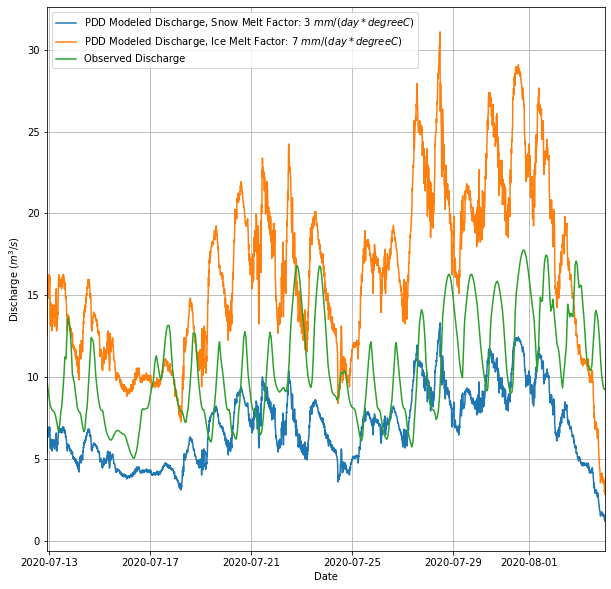

In [270]:
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')


ax.plot(dates_for_temp,m_s, label = 'PDD Modeled Discharge, Snow Melt Factor: 3 $mm/(day*degree C)$')
ax.plot(dates_for_temp, m_i, label = 'PDD Modeled Discharge, Ice Melt Factor: 7 $mm/(day*degree C)$')
ax.plot(times, f['Discharge'][:], label = 'Observed Discharge')

ax.xaxis_date()
ax.set_xlim([times[0],times[-1]])
ax.set_xlim(ax3.get_ylim()[::-1])
ax.set_ylabel('Discharge $(m^3/s)$')
ax.set_xlabel('Date')
ax.legend()
ax.grid()



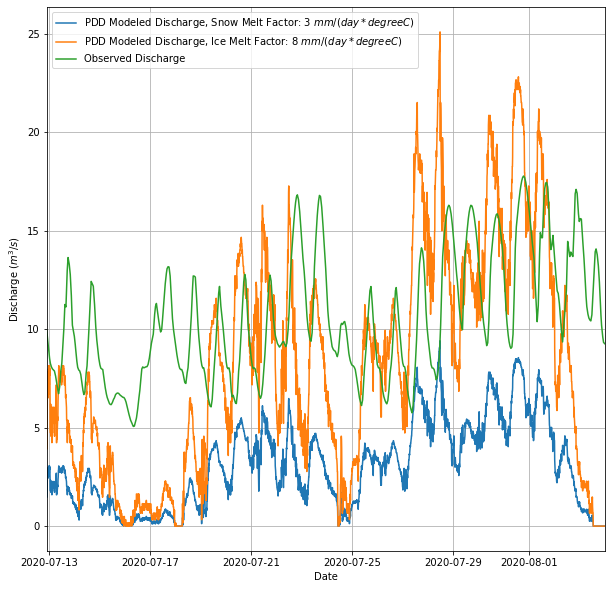

In [186]:
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')


ax.plot(dates_for_temp,m_s_corr, label = 'PDD Modeled Discharge, Snow Melt Factor: 3 $mm/(day*degree C)$')
ax.plot(dates_for_temp, m_i_corr, label = 'PDD Modeled Discharge, Ice Melt Factor: 8 $mm/(day*degree C)$')
ax.plot(times, f['Discharge'][:], label = 'Observed Discharge')

ax.xaxis_date()
ax.set_xlim([times[0],times[-1]])
ax.set_xlim(ax3.get_ylim()[::-1])
ax.set_ylabel('Discharge $(m^3/s)$')
ax.set_xlabel('Date')
ax.legend()
ax.grid()

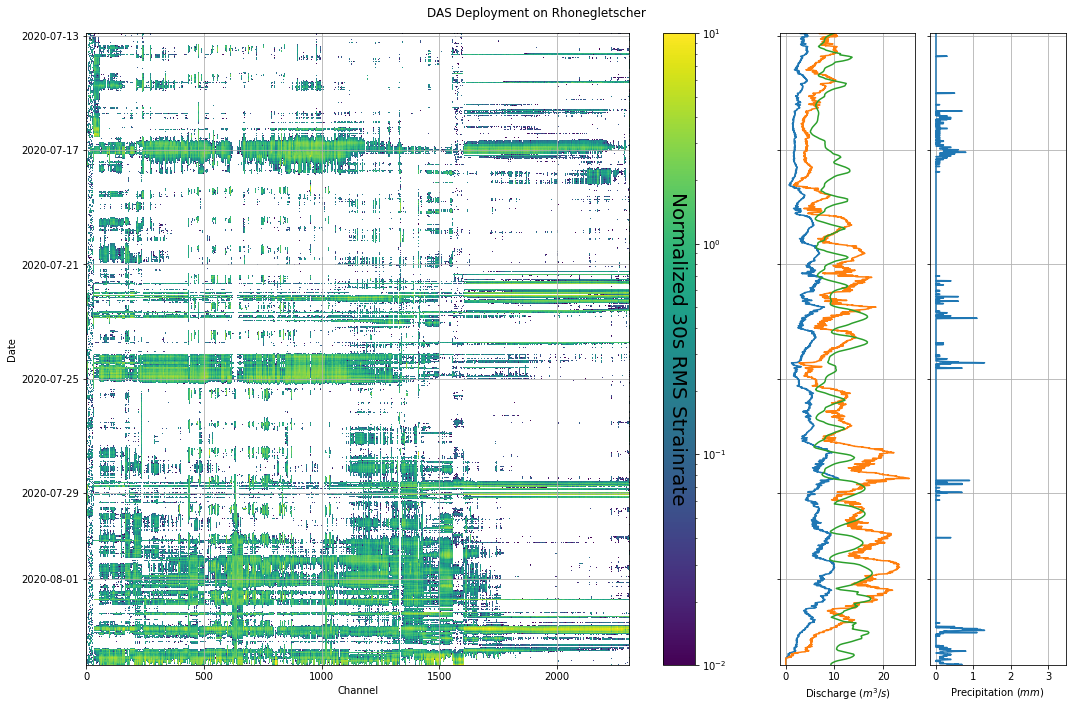

In [271]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib notebook

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols =3, figsize = [15,10], gridspec_kw={'width_ratios': [5, 1, 1]})
fig.suptitle('DAS Deployment on Rhonegletscher')
fig.patch.set_facecolor('white')

im = ax1.imshow(normed_das, aspect='auto', norm=matplotlib.colors.LogNorm(vmin = 0.01, vmax = 10), extent = [0, 2308,  times[-1], times[0]]) 
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Normalized 30s RMS Strainrate', rotation = '270', labelpad = -40, size = 20)
ax1.grid()
ax1.set_xlabel('Channel')
ax1.set_ylabel('Date')
ax1.yaxis_date()

ax2.plot(m_s_corr, dates_for_temp, label = 'PDD Modeled Discharge, Snow Melt Factor: 3 $mm/(day*degree C)$')
ax2.plot( m_i_corr, dates_for_temp, label = 'PDD Modeled Discharge, Ice Melt Factor: 8 $mm/(day*degree C)$')
ax2.plot(f['Discharge'][:], times, label = 'Observed Discharge')
# ax2.plot(f['Discharge'][:], times)
ax2.yaxis_date()
ax2.set_ylim([times[0],times[-1]])
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_xlabel('Discharge $(m^3/s)$')
ax2.set_yticklabels([])
ax2.grid()
#ax2.legend(loc=(1.04,0))

ax3.plot(precip, dates_for_temp)
ax3.yaxis_date()
ax3.set_ylim([times[0],times[-1]])
ax3.set_ylim(ax3.get_ylim()[::-1])
ax3.set_xlabel('Precipitation $(mm)$')
ax3.set_yticklabels([])
ax3.grid()

plt.tight_layout()
plt.show()

# Finding the best combination of melt rate and lapse rate

In [244]:
true_discharge = f['Discharge'][:]

melt_factor = [3,4,5,6,7,8]
lapse_rates = [3,4,5,6,7,8,9,10]

In [245]:
analysis = pd.DataFrame(columns = ['Goodness of Fit', 'Melt Factor', 'Lapse Rate'])

NameError: name 'melt_factor' is not defined

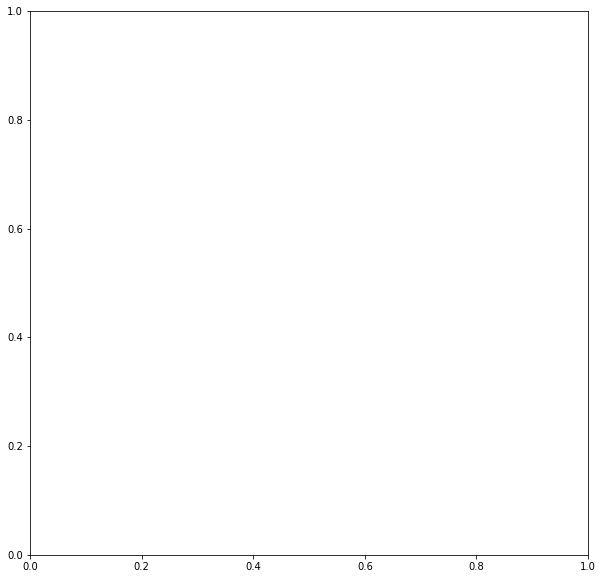

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')


for a in melt_factor:
     for b in lapse_rates:
            
            m_corr = []
            new_temp = (np.asarray(temp) - b)
            
            for i,j in zip(new_temp, precip):
                if i > 0:

                    #m = (delta_time * (i) * a * area_rhone / ten_min_to_secs / mm3_to_m3) + (j*area_rhone/mm3_to_m3) #precip included??
                    m = (delta_time * (i)  * a * area_rhone / ten_min_to_secs / mm3_to_m3) #no precip
                    m_corr.append(m)

                else:
                    #m = (j*area_rhone/mm3_to_m3) #precip included??
                    m = 0 #no preip
                    m_corr.append(m)
            
#             PDD_at_discharge = []

#             for dis_time in times:
#                 interp_PDD = np.interp(dis_time, dates_for_temp, m_corr)
#                 PDD_at_discharge.append(interp_PDD)
                
#             goodness_of_fit = np.average((PDD_at_discharge-true_discharge))
            
#             df2 = pd.DataFrame([goodness_of_fit, a, b], columns = ['Goodness of Fit', 'Melt Factor', 'Lapse Rate'])
#             analysis.append(df2)
#             print(goodness_of_fit)
                
            ax.plot(dates_for_temp,m_corr, label = 'PDD, melt factor: '+str(a)+', lapse rate: '+str(b), color = 'lightgray' )
#ax.legend()
ax.plot(times, true_discharge, label = 'Observed Discharge')
ax.xaxis_date()
ax.set_xlim([times[0],times[-1]])
ax.set_xlim(ax3.get_ylim()[::-1])
ax.set_ylabel('Discharge $(m^3/s)$')
ax.set_xlabel('Date')
ax.grid()


# Goodness of fit analysis, table

In [259]:
true_discharge = f['Discharge'][:]

melt_factor = [3,4,5,6,7,8]
lapse_rates = [3,4,5,6,7,8,9,10]

In [272]:
fit = []
melt = []
lapse = []

for a in melt_factor:
     for b in lapse_rates:
            
            m_corr = []
            new_temp = (np.asarray(temp) - b)
            
            for i,j in zip(new_temp, precip):
                if i > 0:

                    #m = (delta_time * (i) * a * area_rhone / ten_min_to_secs / mm3_to_m3) + (j*area_rhone/mm3_to_m3) #precip included??
                    m = (delta_time * (i) * a * area_rhone / ten_min_to_secs / mm3_to_m3) #no precip
                    m_corr.append(m)

                else:
                    #m = (j*area_rhone/mm3_to_m3) #precip included??
                    m = 0 #no preip
                    m_corr.append(m)
                    
            PDD_at_discharge = []

            for dis_time in times:
                interp_PDD = np.interp(dis_time, dates_for_temp, m_corr)
                PDD_at_discharge.append(interp_PDD)
                
            goodness_of_fit = sum(abs((PDD_at_discharge-true_discharge)))
                    
            fit.append(goodness_of_fit)
            melt.append(a)
            lapse.append(b)
            
analysis = pd.DataFrame({'Goodness of Fit':fit, 'Melt Factor':melt, 'Lapse Rate':lapse})

In [280]:
analysis

,Goodness of Fit,Melt Factor,Lapse Rate
0,346060.223268,3,3
1,381995.304318,3,4
2,418625.910361,3,5
3,455384.105629,3,6
4,491278.848905,3,7
5,523020.960911,3,8
6,551110.947951,3,9
7,575917.252575,3,10
8,264330.879913,4,3
9,303457.839432,4,4


In [282]:
analysis.sort_values(by=['Goodness of Fit'])

,Goodness of Fit,Melt Factor,Lapse Rate
24,212443.195697,6,3
16,216979.632361,5,3
25,229552.711414,6,4
33,241601.415482,7,4
17,249969.337756,5,4
32,250170.041088,7,3
34,255216.834676,7,5
26,260570.121035,6,5
8,264330.879913,4,3
42,274625.287550,8,5


In [58]:
melt_fact = 6 #mm/(day*degree C)
area_rhone = 17.6e12 #mm squared


lapse_rate_corr = 3 #celcius/1000m
ten_min_to_secs = 600 # seconds in 10 minuntes

mm3_to_m3 = 1e9

area_rhone_m = 17.6e6

In [59]:
melt_fact_cor = melt_fact / ( 1000 * 86400)
melt_fact_cor

6.944444444444444e-08

In [64]:

PDD_dis = []
PDD_dis_precip = []

new_temp = (np.asarray(temp) - (lapse_rate_corr)*diff_in_alt)

for i,j in zip(new_temp, precip):
    if i > 0:

        dis =   i * melt_fact_cor * area_rhone_m
        dis_precip =  (i * melt_fact_cor * area_rhone_m) + (j* 0.001 * area_rhone_m/ten_min_to_secs) #precip included??
        
        PDD_dis_precip.append(dis_precip)
        PDD_dis.append(dis)

    else:
        dis = 0
        dis_precip = (j*area_rhone/mm3_to_m3/ten_min_to_secs)
        PDD_dis_precip.append(dis_precip)
        PDD_dis.append(dis)
    



    

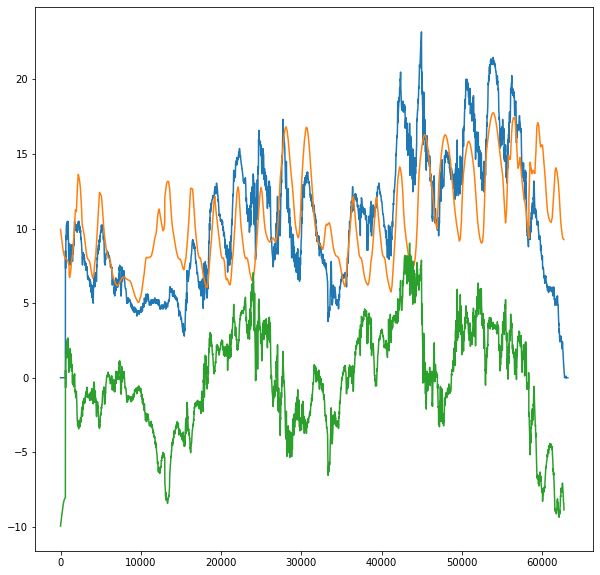

In [84]:
#residuals
PDD_dis_res = np.interp(times,dates_for_temp,  PDD_dis)



# PDD_spaced =  list(0 for i in range(0,120)) + PDD_dis_res


PDD_spaced = np.insert(PDD_dis_res, 0, list(0 for i in range(0,600)))


PDD_residual = PDD_spaced[:-600] - f['Discharge'][:]

fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')
ax.plot(PDD_spaced[:-120])
ax.plot(f['Discharge'][:])
ax.plot(PDD_residual)

In [89]:
rmse = np.sqrt(np.mean(PDD_residual[600:]**2))

rmse

3.51311108735325

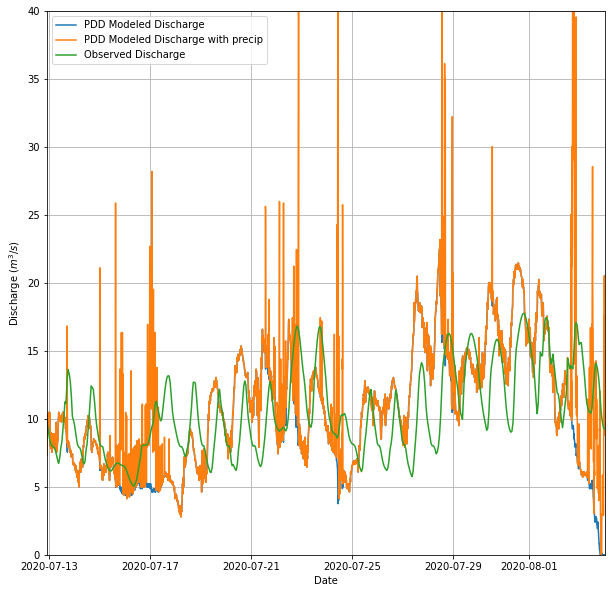

In [67]:
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')


ax.plot(dates_for_temp,PDD_dis, label = 'PDD Modeled Discharge')
ax.plot(dates_for_temp,PDD_dis_precip, label = 'PDD Modeled Discharge with precip')
ax.plot(times, f['Discharge'][:], label = 'Observed Discharge')

ax.xaxis_date()
ax.set_xlim([times[0],times[-1]])
ax.set_xlim(ax3.get_ylim()[::-1])
ax.set_ylabel('Discharge $(m^3/s)$')
ax.set_xlabel('Date')
ax.set_ylim([0,40])
ax.legend()
ax.grid()

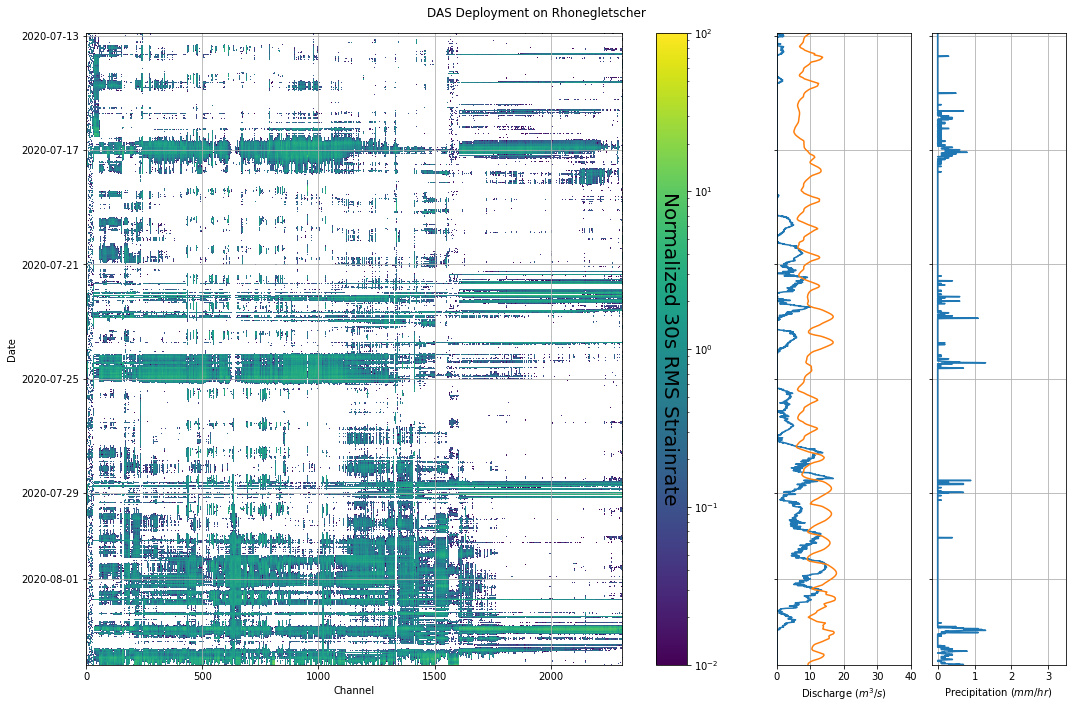

In [315]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib notebook

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols =3, figsize = [15,10], gridspec_kw={'width_ratios': [5, 1, 1]})
fig.suptitle('DAS Deployment on Rhonegletscher')
fig.patch.set_facecolor('white')

im = ax1.imshow(normed_das, aspect='auto', norm=matplotlib.colors.LogNorm(vmin = 0.01 , vmax = 100), extent = [0, 2308,  times[-1], times[0]]) 
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Normalized 30s RMS Strainrate', rotation = '270', labelpad = -40, size = 20)
ax1.grid()
ax1.set_xlabel('Channel')
ax1.set_ylabel('Date')
ax1.yaxis_date()

ax2.plot(PDD_dis, dates_for_temp, label = 'PDD Modeled Discharge')
#ax2.plot(PDD_dis_precip,dates_for_temp, label = 'PDD Modeled Discharge with precip')
ax2.plot(f['Discharge'][:], times)
ax2.yaxis_date()
ax2.set_ylim([times[0],times[-1]])
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_xlim([0,40])
ax2.set_xlabel('Discharge $(m^3/s)$')
ax2.set_yticklabels([])
ax2.grid()
#ax2.legend()

ax3.plot(precip, dates_for_temp)
ax3.yaxis_date()
ax3.set_ylim([times[0],times[-1]])
ax3.set_ylim(ax3.get_ylim()[::-1])
ax3.set_xlabel('Precipitation $(mm/hr)$')
ax3.set_yticklabels([])
ax3.grid()

plt.tight_layout()
plt.show()